In [2]:
from importlib import reload
import utils_tf as u
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
import IPython
import IPython.display
import matplotlib as mpl
import pandas as pd
import seaborn as sns

reload(u)

<module 'utils_tf' from 'c:\\Users\\Max\\OneDrive - National University of Singapore\\CentraleSupelec\\Networks for intelligent cities\\Project\\ST7_Forecasting_RTE\\utils_tf.py'>

In [3]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [4]:
wide_RNN_window = u.WindowGenerator(
    input_width=200, label_width=200, shift=1,
    label_columns=['y'])

In [5]:
history = u.compile_and_fit(lstm_model, wide_RNN_window)

val_performance = {}
performance = {}

val_performance['LSTM'] = lstm_model.evaluate(wide_RNN_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_RNN_window.test, verbose=0)

Epoch 1/20
313/313 [==============================] - 23s 65ms/step - loss: 0.2577 - root_mean_squared_error: 0.5077 - val_loss: 0.0888 - val_root_mean_squared_error: 0.2980
Epoch 2/20
313/313 [==============================] - 20s 63ms/step - loss: 0.0682 - root_mean_squared_error: 0.2612 - val_loss: 0.0460 - val_root_mean_squared_error: 0.2144
Epoch 3/20
313/313 [==============================] - 20s 63ms/step - loss: 0.0444 - root_mean_squared_error: 0.2107 - val_loss: 0.0368 - val_root_mean_squared_error: 0.1917
Epoch 4/20
313/313 [==============================] - 21s 66ms/step - loss: 0.0365 - root_mean_squared_error: 0.1912 - val_loss: 0.0337 - val_root_mean_squared_error: 0.1835
Epoch 5/20
313/313 [==============================] - 20s 65ms/step - loss: 0.0315 - root_mean_squared_error: 0.1775 - val_loss: 0.0310 - val_root_mean_squared_error: 0.1761
Epoch 6/20
313/313 [==============================] - 20s 64ms/step - loss: 0.0268 - root_mean_squared_error: 0.1637 - val_loss: 0

In [10]:
performance

{'LSTM': [0.021186240017414093, 0.14555494487285614]}

In [6]:
#Saving model as h5 file so it can be loaded at anytime
lstm_model.save("lstm_model_df2.h5")

Plot shape has a huge difference due to data being truncated from merging different timesteps, as a result prediction becomes harder due to smaller dataset

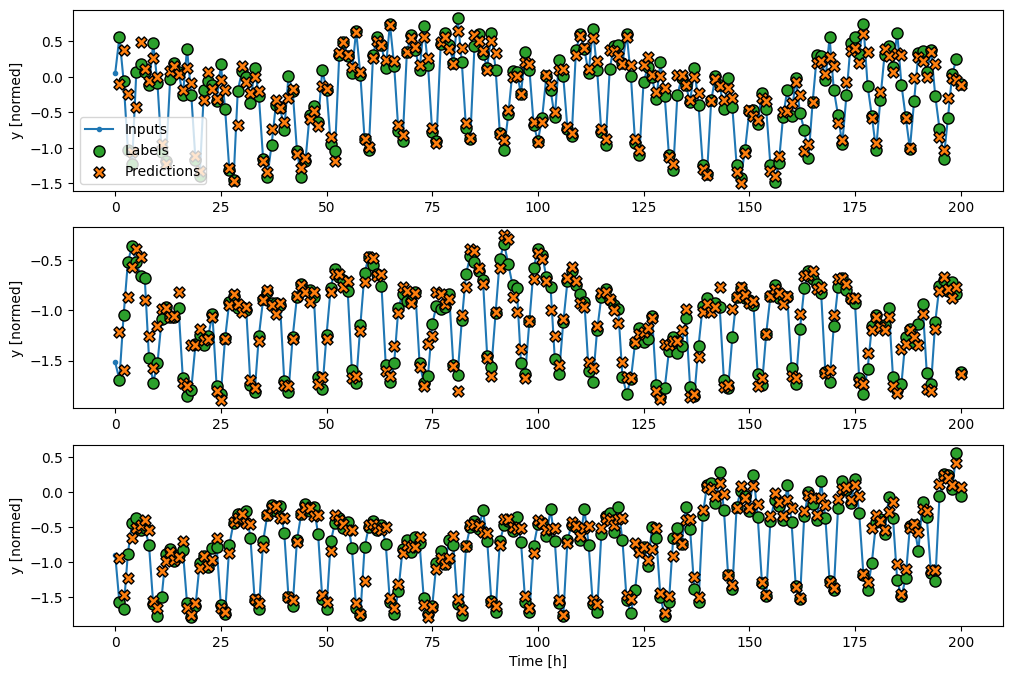

In [7]:
wide_RNN_window.plot(lstm_model)

In [8]:
less_wide_RNN_window = u.WindowGenerator(
    input_width=50, label_width=50, shift=1,
    label_columns=['y'])

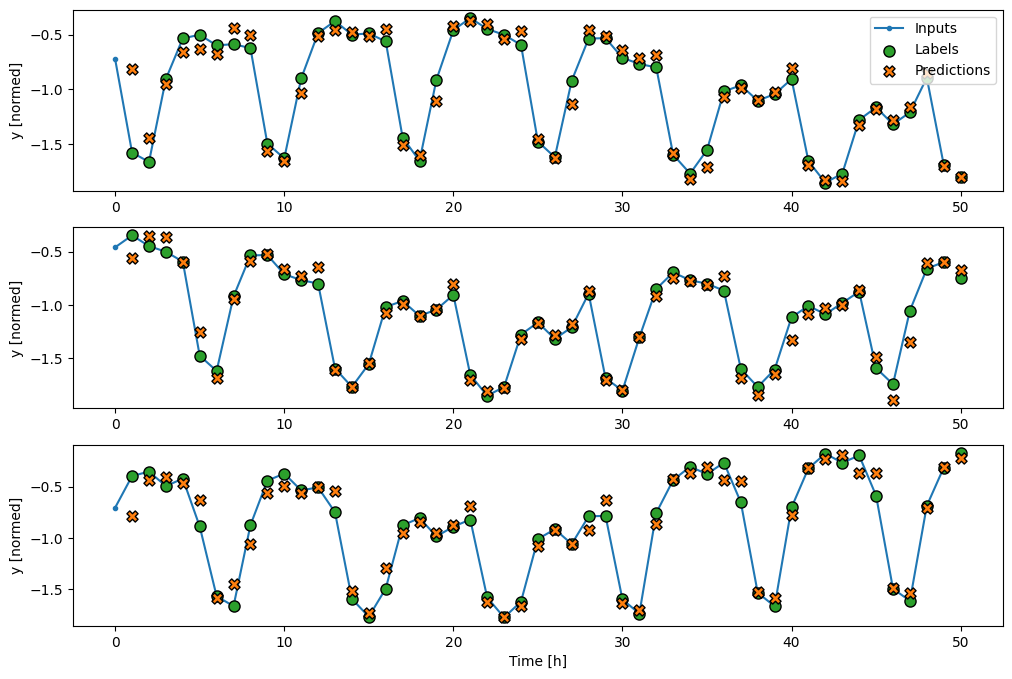

In [9]:
less_wide_RNN_window.plot(lstm_model)